# Data Visualisation and EDA (part-3)

In previous parts we perfomed data collection and data cleaning. Now we have our cleaned dataset and we are going to perform EDA and see various trends and insights in the dataset

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import os
import warnings
warnings.filterwarnings('ignore')



In [2]:
pip install wordcloud

In [3]:
from  wordcloud import WordCloud, STOPWORDS

In [4]:
#creating the dataframe from the cleaned csv file
cwd = os.getcwd()
df = pd.read_csv(cwd+'/Cleaned_BA_reviews', index_col = 0)
df

,reviews,stars,date,country,verified,corpus
0,"Not Verified | The worst service ever, my bag...",5,2023-09-09,Kuwait,False,verified worst service ever baggage arrive tim...
1,✅ Trip Verified | 4/4 flights we booked this ...,1,2023-09-06,Germany,True,trip verified flight booked holiday delayed ho...
2,✅ Trip Verified | British Airways has a total...,1,2023-09-04,United Kingdom,True,trip verified british airway total lack respec...
3,"✅ Trip Verified | London Heathrow to Keflavik,...",1,2023-09-04,Iceland,True,trip verified london heathrow keflavik iceland...
4,✅ Trip Verified | Mumbai to London Heathrow in...,8,2023-09-04,Iceland,True,trip verified mumbai london heathrow business ...
...,...,...,...,...,...,...
3645,✅ Trip Verified | Care and support shocking. ...,8,2023-09-04,United Kingdom,True,trip verified care support shocking written pr...
3646,✅ Trip Verified | Flying A380 business class ...,8,2023-09-02,Australia,True,trip verified flying business class pleasure b...
3647,✅ Trip Verified | British Airways absolutely ...,2,2023-09-01,United Kingdom,True,trip verified british airway absolutely care r...
3648,✅ Trip Verified | My recent experience with B...,1,2023-09-01,United States,True,trip verified recent experience british airway...


In [5]:
#checking the mean of the ratings given by the users
df.stars.mean()

2.728219178082192

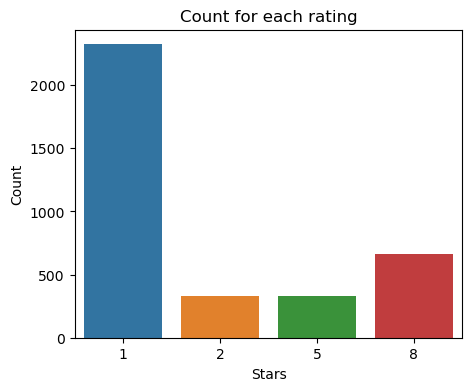

In [6]:
#plotting the value counts for each rating

plt.figure(figsize = (5,4))

sns.countplot(df['stars'])
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Count for each rating')
plt.show()


Creating a dataframe to show much much percentage each star rating has in our dataset

In [7]:
df_rating = pd.DataFrame(df['stars'].value_counts())
percent_values = (df_rating.stars.values / df_rating.stars.values.sum() * 100).tolist()
percent_values = [round(x, 2) for x in percent_values]
df_rating['percent_values'] = percent_values
df_rating


,stars,percent_values
1,2322,63.62
8,664,18.19
5,332,9.10
2,332,9.10


In [8]:
#resetting index as we do not want to confuse between the index and the rating values
df_rating = df_rating.reset_index()
# renaming columns
df_rating.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
df_rating

,Stars,total_counts,percent_values
0,1,2322,63.62
1,8,664,18.19
2,5,332,9.10
3,2,332,9.10


In [9]:
#name of unique countries from which we received reviews from
df['country'].unique()

array([' Kuwait ', ' Germany ', ' United Kingdom ', ' Iceland ',
       ' Australia ', ' United States '], dtype=object)

Plotting a graph about how much reviews are posted by which country

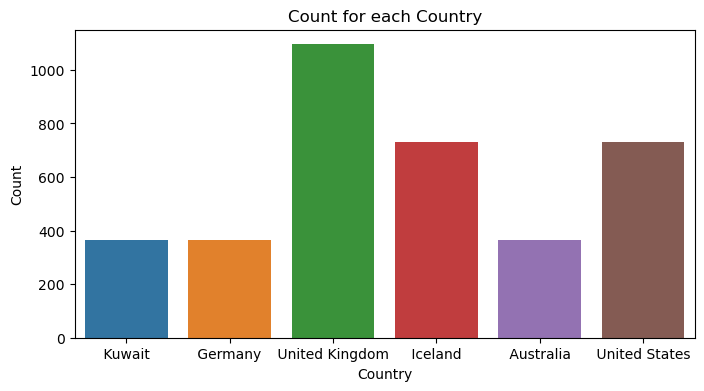

In [11]:
plt.figure(figsize = (8,4))

sns.countplot(df['country'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count for each Country')
plt.show()

Plotting Country Wise Rating

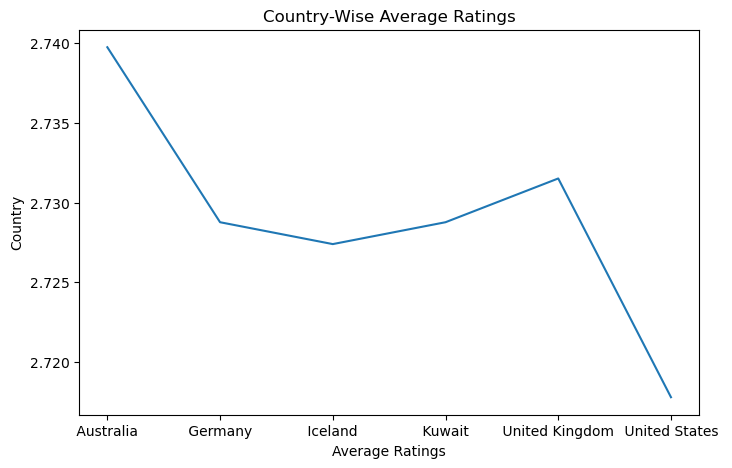

In [34]:
country_avg_ratings = df.groupby('country')['stars'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(country_avg_ratings['country'], country_avg_ratings['stars'])
plt.xlabel('Average Ratings')
plt.ylabel('Country')
plt.title('Country-Wise Average Ratings')
plt.show()


Creating a worldcloud image which will give us an image about the keywords that are most highlighted in reviews

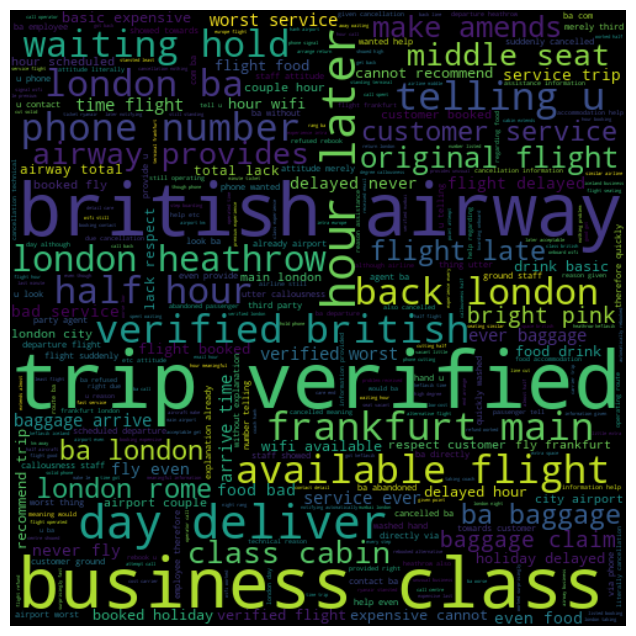

In [39]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(15,8))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that there are many words which doesn't allow us to classify whether a review is positive or not. So we will uopdate the stopwords list and include the higher font words in it 

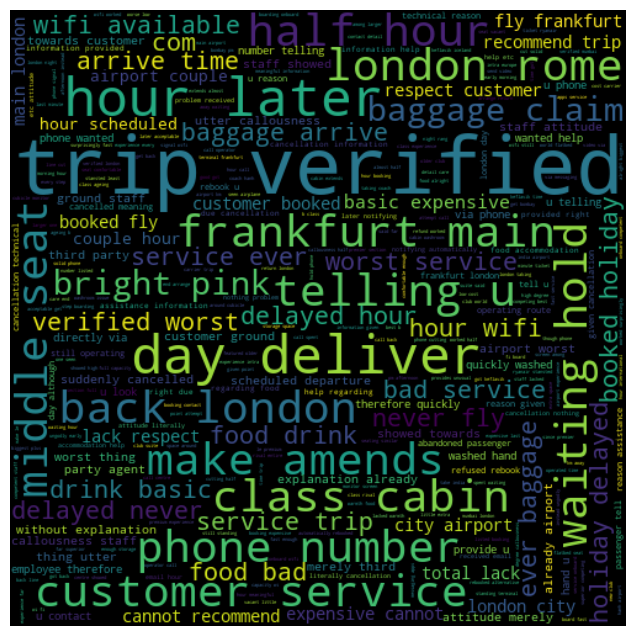

In [42]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(15,8))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would","business"])

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
df['date'].value_counts()

2023-09-04    1460
2023-09-01     730
2023-09-09     365
2023-09-06     365
2023-09-02     365
2023-08-31     365
Name: date, dtype: int64